<a href="https://colab.research.google.com/github/Hyerinrin/AI-Lesson/blob/main/%EC%9D%B8%EA%B3%B5%EC%A7%80%EB%8A%A512%EC%A3%BC%EC%B0%A8_ipynb%EC%9D%98_%EC%82%AC%EB%B3%B8%EC%9D%98_%EC%82%AC%EB%B3%B8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [ ]:
cd /content/drive/MyDrive/Colab Notebooks

/content/drive/MyDrive/Colab Notebooks


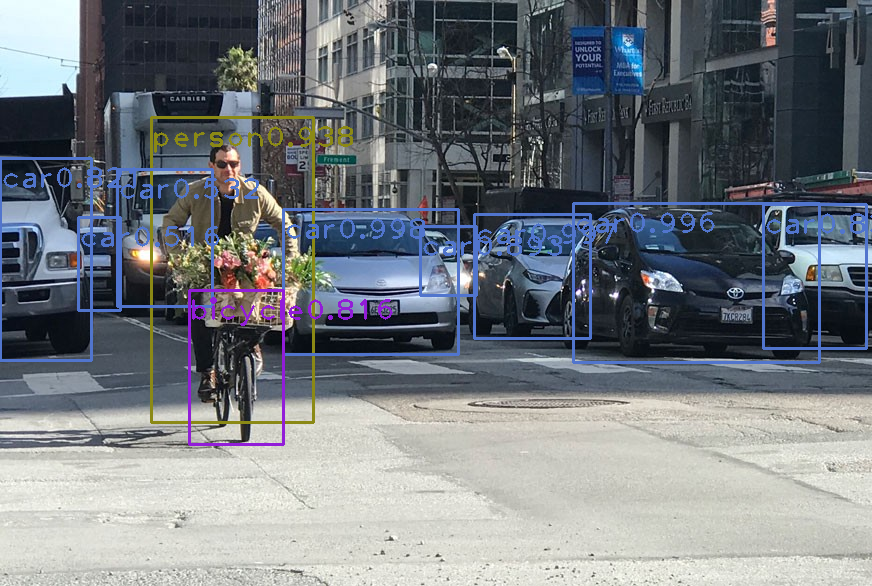

In [ ]:
import numpy as np
import cv2
from google.colab.patches import cv2_imshow

classes = []
f=open('coco.names.txt','r')
classes=[line.strip() for line in f.readlines()]
colors=np.random.uniform(0,255,size=(len(classes),3))

img=cv2.imread('yolo_test2.jpeg')
height,width,channels=img.shape
blob=cv2.dnn.blobFromImage(img,1.0/256,(448,448),(0,0,0),swapRB=True,crop=False)

yolo_model=cv2.dnn.readNet('./yolov3.weights','./yolov3.cfg')
layer_names=yolo_model.getLayerNames()
out_layers=[layer_names[i[0]-1] for i in yolo_model.getUnconnectedOutLayers()]

yolo_model.setInput(blob)
output3=yolo_model.forward(out_layers)

class_ids,confidences,boxes=[],[],[]
for output in output3:
  for vec85 in output:
    scores=vec85[5:]
    class_id=np.argmax(scores)
    confidence=scores[class_id]
    if confidence>0.5:
      centerx,centery=int(vec85[0]*width),int(vec85[1]*height)
      w,h=int(vec85[2]*width),int(vec85[3]*height)
      x,y=int(centerx-w/2),int(centery-h/2)
      boxes.append([x,y,w,h])
      confidences.append(float(confidence))
      class_ids.append(class_id)
indexes=cv2.dnn.NMSBoxes(boxes,confidences,0.5,0.4)

for i in range(len(boxes)):
  if i in indexes:
    x,y,w,h=boxes[i]
    text=str(classes[class_ids[i]])+'%.3f'%confidences[i]
    cv2.rectangle(img,(x,y),(x+w,y+h),colors[class_ids[i]],2)
    cv2.putText(img,text,(x,y+30),cv2.FONT_HERSHEY_PLAIN,2,colors[class_ids[i]],2)

cv2_imshow(img)

데이터 길이: 365 
앞쪽 5개 값: [[3772.93633533]
 [3799.67854295]
 [3811.61197937]
 [3804.41917011]
 [3782.66410112]]


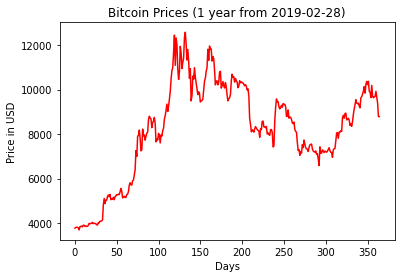

(358, 7, 1) (358, 1)
[[3772.93633533]
 [3799.67854295]
 [3811.61197937]
 [3804.41917011]
 [3782.66410112]
 [3689.86289319]
 [3832.08088473]] [3848.95636968]
[[9631.48494596]
 [9670.85865437]
 [9689.08674285]
 [9919.55144784]
 [9640.46950506]
 [9392.86962872]
 [8787.97836316]] [8784.99535244]


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

f= open('BTC_USD_2019-02-28_2020-02-27-CoinDesk.csv','r')
coindesk_data=pd.read_csv(f,header=0)
seq = coindesk_data[['Closing Price (USD)']].to_numpy()
print('데이터 길이:',len(seq),'\n앞쪽 5개 값:',seq[0:5])

plt.plot(seq,color='red')
plt.title('Bitcoin Prices (1 year from 2019-02-28)')
plt.xlabel('Days');plt.ylabel('Price in USD')
plt.show()

def seq2dataset(seq,window,horizon):
  X=[]; Y=[]
  for i in range(len(seq)-(window+horizon)+1):
    x=seq[i:(i+window)]
    y=(seq[i+window+horizon-1])
    X.append(x); Y.append(y)
  return np.array(X), np.array(Y)

w=7
h=1

X,Y = seq2dataset(seq,w,h)
print(X.shape,Y.shape)
print(X[0],Y[0]);print(X[-1],Y[-1])

# 새 섹션